# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [2]:
# Import the appropriate libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

# Create two new dataframes

north_df=pd.read_csv('NorthCallCenter.csv')

south_df=pd.read_csv('SouthCallCenter.csv')

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, make sure you answer the following questions:

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [3]:
# Put your EDA code here
north_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [4]:
print('north shape: ',north_df.shape,'South shape: ',south_df.shape)

north shape:  (245, 15) South shape:  (314, 15)


-- south dataframe has 69 more records

In [5]:
north_df.describe()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,245.000000,245.000000,245.000000,245.000000,245.000000,82.000000,245.000000,245.0
mean,122.000000,0.020408,0.028571,9.987755,1.914286,3.048780,2.967347,1.0
std,70.869599,0.141681,0.166940,1.403980,0.771416,1.456382,0.843827,0.0
min,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,2.000000,1.0
25%,61.000000,0.000000,0.000000,9.000000,1.000000,2.000000,2.000000,1.0
50%,122.000000,0.000000,0.000000,10.000000,2.000000,3.000000,3.000000,1.0
75%,183.000000,0.000000,0.000000,11.000000,3.000000,4.000000,4.000000,1.0
max,244.000000,1.000000,1.000000,12.000000,3.000000,5.000000,4.000000,1.0


In [6]:
north_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Incoming Wait Time     82 non-null     float64
 13  During Call Wait Time  245 non-null    int64  
 14  Calls                  245 non-null    int64  
dtypes: flo

In [7]:
north_df[north_df['Incoming Wait Time'].isna()].head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
82,82,North,Sales Support,10:00 AM,Outgoing,A,Cam,NO,1,0,8,1,NaN,2,1
83,83,North,Sales Support,10:00 AM,Outgoing,B,Duke,NO,1,0,10,2,NaN,4,1
84,84,North,Sales Support,11:00 AM,Outgoing,B,Xander,NO,1,0,10,1,NaN,4,1
85,85,North,Product Support,9:00 AM,Outgoing,B,Duke,NO,1,0,12,1,NaN,2,1
86,86,North,Sales Support,10:00 AM,Outgoing,B,Lilly,YES,0,1,9,3,NaN,4,1


In [8]:
south_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


In [9]:
south_df.describe()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,314.000000,314.000000,314.000000,314.00000,314.000000,126.000000,314.000000,314.0
mean,156.500000,0.035032,0.012739,10.05414,1.910828,3.000000,3.076433,1.0
std,90.788215,0.184154,0.112324,1.40751,0.860016,1.308434,0.819424,0.0
min,0.000000,0.000000,0.000000,8.00000,1.000000,1.000000,2.000000,1.0
25%,78.250000,0.000000,0.000000,9.00000,1.000000,2.000000,2.000000,1.0
50%,156.500000,0.000000,0.000000,10.00000,2.000000,3.000000,3.000000,1.0
75%,234.750000,0.000000,0.000000,11.00000,3.000000,4.000000,4.000000,1.0
max,313.000000,1.000000,1.000000,12.00000,3.000000,5.000000,4.000000,1.0


In [10]:
south_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             314 non-null    int64  
 1   Branch                 314 non-null    object 
 2   Call Purpose           314 non-null    object 
 3   Time Block             314 non-null    object 
 4   Incoming or Outgoing   314 non-null    object 
 5   Queue                  314 non-null    object 
 6   Rep ID                 314 non-null    object 
 7   Sale                   314 non-null    object 
 8   Lost Call              314 non-null    int64  
 9   Abandoned              314 non-null    int64  
 10  Busy Minutes           314 non-null    int64  
 11  Not Ready Minutes      314 non-null    int64  
 12  Incoming Wait Time     126 non-null    float64
 13  During Call Wait Time  314 non-null    int64  
 14  Calls                  314 non-null    int64  
dtypes: flo

In [11]:
print(north_df['Rep ID'].value_counts(), south_df['Rep ID'].value_counts())

Brent     37
Lilly     30
Todd      29
Duke      29
Joe       26
Cam       24
Xander    24
Amanda    23
Andy      23
Name: Rep ID, dtype: int64 Eric      35
Randy     33
Sandy     32
Helga     31
Kate      29
George    29
Karl      28
Susan     26
Josh      26
Sharon    25
Alice     20
Name: Rep ID, dtype: int64


In [12]:
print(north_df['Rep ID'].nunique(), south_df['Rep ID'].nunique())

9 11


In [13]:
avg_list=['Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time']
north_wait_avg=north_df[avg_list].mean().to_frame().rename(columns={0:'N Avg Wait Times'})
north_wait_avg


,N Avg Wait Times
Busy Minutes,9.987755
Not Ready Minutes,1.914286
Incoming Wait Time,3.048780
During Call Wait Time,2.967347


In [14]:
south_wait_avg=south_df[avg_list].mean().to_frame().rename(columns={0:'S Avg Wait Times'})
south_wait_avg

,S Avg Wait Times
Busy Minutes,10.054140
Not Ready Minutes,1.910828
Incoming Wait Time,3.000000
During Call Wait Time,3.076433


In [15]:
both_wait_avg=south_wait_avg.join(north_wait_avg, how='left')
both_wait_avg

,S Avg Wait Times,N Avg Wait Times
Busy Minutes,10.054140,9.987755
Not Ready Minutes,1.910828,1.914286
Incoming Wait Time,3.000000,3.048780
During Call Wait Time,3.076433,2.967347


In [16]:
north_time_numbers=north_df['Time Block'].value_counts().to_frame()
north_time_numbers.rename(columns={'Time Block':'N Call Count'}, inplace=True)
north_time_numbers

,N Call Count
12:00 PM,45
10:00 AM,43
2:00 PM,35
3:00 PM,30
4:00 PM,28
11:00 AM,25
1:00 PM,17
5:00 PM,17
9:00 AM,5


In [17]:
south_time_numbers=south_df['Time Block'].value_counts().to_frame().rename(columns={'Time Block':'S Call Count'})
#south_time_numbers.rename(columns={'Time Block':'S Call Count'})
south_time_numbers

,S Call Count
12:00 PM,75
10:00 AM,56
3:00 PM,43
11:00 AM,31
2:00 PM,30
5:00 PM,26
4:00 PM,25
1:00 PM,23
9:00 AM,5


In [18]:
#south_time_df=south_df[['Time Block']].value_counts().groupby('Time Block')

#south_time_df=pd.DataFrame(data=south_df, index=south_df['Time Block'].groupby('Time Block'), columns=south_df['Time Block'].value_counts())
#south_time_df

In [19]:
south_time_percent=south_time_numbers/(len(south_df))*100
south_time_percent

,S Call Count
12:00 PM,23.885350
10:00 AM,17.834395
3:00 PM,13.694268
11:00 AM,9.872611
2:00 PM,9.554140
5:00 PM,8.280255
4:00 PM,7.961783
1:00 PM,7.324841
9:00 AM,1.592357


In [20]:
south_time_numbers['S Percentage']=south_time_numbers['S Call Count']/(len(south_df))*100
south_time_numbers

,S Call Count,S Percentage
12:00 PM,75,23.885350
10:00 AM,56,17.834395
3:00 PM,43,13.694268
11:00 AM,31,9.872611
2:00 PM,30,9.554140
5:00 PM,26,8.280255
4:00 PM,25,7.961783
1:00 PM,23,7.324841
9:00 AM,5,1.592357


In [21]:
#(north_df['Time Block'].value_counts())/(len(north_df['Time Block']))*100
#north_time_percent=north_time_numbers/(len(north_df))*100
north_time_numbers['N Call Percentage']=north_time_numbers['N Call Count']/(len(north_df))*100
north_time_numbers

,N Call Count,N Call Percentage
12:00 PM,45,18.367347
10:00 AM,43,17.551020
2:00 PM,35,14.285714
3:00 PM,30,12.244898
4:00 PM,28,11.428571
11:00 AM,25,10.204082
1:00 PM,17,6.938776
5:00 PM,17,6.938776
9:00 AM,5,2.040816


In [22]:

both_time_numbers=north_time_numbers.join(south_time_numbers, how='left')

both_time_numbers

,N Call Count,N Call Percentage,S Call Count,S Percentage
12:00 PM,45,18.367347,75,23.885350
10:00 AM,43,17.551020,56,17.834395
2:00 PM,35,14.285714,30,9.554140
3:00 PM,30,12.244898,43,13.694268
4:00 PM,28,11.428571,25,7.961783
11:00 AM,25,10.204082,31,9.872611
1:00 PM,17,6.938776,23,7.324841
5:00 PM,17,6.938776,26,8.280255
9:00 AM,5,2.040816,5,1.592357


In [23]:
both_wait_avg

,S Avg Wait Times,N Avg Wait Times
Busy Minutes,10.054140,9.987755
Not Ready Minutes,1.910828,1.914286
Incoming Wait Time,3.000000,3.048780
During Call Wait Time,3.076433,2.967347


### EDA Results

Make note of your results here!

1. How many reps are in each branch? 
    north: 9 reps, south: 11 reps
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
See table directly above
3. What is the number of calls taken for each time block? see both_time_numbers dataframe above.

## Cleaning Data

Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets:

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [24]:
# Clean your data here
north_df_incoming_na=north_df[north_df['Incoming Wait Time'].isna()]

north_df_incoming_na['Incoming or Outgoing'].value_counts()


Outgoing    163
Name: Incoming or Outgoing, dtype: int64

In [25]:
south_df_incoming_na=south_df[south_df['Incoming Wait Time'].isna()]

south_df_incoming_na['Incoming or Outgoing'].value_counts()

#all rows with n/a for 'Incoming wait time' correspond to Outgoing calls. and thus explains the anomaly 

Outgoing    188
Name: Incoming or Outgoing, dtype: int64

In [26]:
north_df['Sale'].value_counts()

NO      234
YES      10
YES       1
Name: Sale, dtype: int64

In [27]:
north_sale=north_df[north_df['Sale']!= 'NO']

north_sale

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
19,19,North,Sales Support,10:00 AM,Incoming,B,Lilly,YES,0,0,11,2,2.0,4,1
40,40,North,Sales Support,12:00 PM,Incoming,B,Lilly,YES,0,0,10,1,3.0,2,1
47,47,North,Sales Support,10:00 AM,Incoming,A,Amanda,YES,0,0,10,3,4.0,3,1
67,67,North,Sales Support,12:00 PM,Incoming,B,Todd,YES,0,0,9,3,5.0,4,1
69,69,North,Sales Support,12:00 PM,Incoming,A,Andy,YES,0,0,10,1,5.0,2,1
86,86,North,Sales Support,10:00 AM,Outgoing,B,Lilly,YES,0,1,9,3,NaN,4,1
87,87,North,Sales Support,10:00 AM,Outgoing,B,Lilly,YES,0,1,12,1,NaN,4,1
99,99,North,Sales Support,10:00 AM,Outgoing,A,Andy,YES,0,0,12,2,NaN,2,1
108,108,North,Sales Support,11:00 AM,Outgoing,B,Lilly,YES,0,0,8,3,NaN,2,1
220,220,North,Product Support,4:00 PM,Outgoing,A,Cam,YES,0,0,8,1,NaN,3,1


In [28]:
#north_sale.loc[: , 'Sale']= north_sale['Sale'].str.strip()



In [29]:
north_df[north_df['Sale'].str.contains('YES')]

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
19,19,North,Sales Support,10:00 AM,Incoming,B,Lilly,YES,0,0,11,2,2.0,4,1
40,40,North,Sales Support,12:00 PM,Incoming,B,Lilly,YES,0,0,10,1,3.0,2,1
47,47,North,Sales Support,10:00 AM,Incoming,A,Amanda,YES,0,0,10,3,4.0,3,1
67,67,North,Sales Support,12:00 PM,Incoming,B,Todd,YES,0,0,9,3,5.0,4,1
69,69,North,Sales Support,12:00 PM,Incoming,A,Andy,YES,0,0,10,1,5.0,2,1
86,86,North,Sales Support,10:00 AM,Outgoing,B,Lilly,YES,0,1,9,3,NaN,4,1
87,87,North,Sales Support,10:00 AM,Outgoing,B,Lilly,YES,0,1,12,1,NaN,4,1
99,99,North,Sales Support,10:00 AM,Outgoing,A,Andy,YES,0,0,12,2,NaN,2,1
108,108,North,Sales Support,11:00 AM,Outgoing,B,Lilly,YES,0,0,8,3,NaN,2,1
220,220,North,Product Support,4:00 PM,Outgoing,A,Cam,YES,0,0,8,1,NaN,3,1


In [30]:
north_df['Sale']=north_df['Sale'].str.strip()

In [31]:
north_df['Sale'].value_counts()

NO     234
YES     11
Name: Sale, dtype: int64

In [32]:
#checking for duplicate rows in both data sets. 
north_df.duplicated().value_counts()

False    245
dtype: int64

In [33]:
south_df.duplicated().value_counts()

False    314
dtype: int64

In [34]:
south_df['Unnamed: 0'].nunique()

314

In [35]:
south_df_dupes=south_df.copy()

south_df_dupes.drop(['Unnamed: 0'], axis=1, inplace=True)

south_df_dupes.duplicated().value_counts()

False    311
True       3
dtype: int64

In [36]:
south_df_dupes=south_df_dupes[south_df_dupes.duplicated()]

south_df_dupes
#taking a look at what might be considered duplicate rows. In reviewing the items, theres nothing to indicate
# that with the "Unnamed: 0" values dropped, that the duplicated rows are out of the ordinary. if the "Unnamed: 0"
# column had any duplicates, I would drop those rows. I can only infer that column acts as a call #, and that each 
# instance, is in fact, unique.

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
58,South,Sales Support,12:00 PM,Incoming,D,Kate,NO,0,0,8,1,3.0,3,1
170,South,Sales Support,11:00 AM,Outgoing,D,Randy,NO,0,0,8,3,NaN,2,1
180,South,Sales Support,12:00 PM,Outgoing,C,Sandy,NO,0,0,8,1,NaN,4,1


In [37]:
#Checking value counts of columns to see if retaining them is necessary
print('North Center Sale \n{0} \n South Center Sale \n{1}'.format(north_df['Sale'].value_counts(), south_df['Sale'].value_counts()))

North Center Sale 
NO     234
YES     11
Name: Sale, dtype: int64 
 South Center Sale 
NO     308
YES      6
Name: Sale, dtype: int64


In [38]:
print('North Center Queue \n{0} \n South Center Queue \n{1}'.format(north_df['Queue'].value_counts(), south_df['Queue'].value_counts()))

North Center Queue 
B    149
A     96
Name: Queue, dtype: int64 
 South Center Queue 
D    176
C    138
Name: Queue, dtype: int64


In [39]:
print('North Center Call Purpose \n{0} \n South Center Call Purpose \n{1}'.format(north_df['Call Purpose'].value_counts(), south_df['Call Purpose'].value_counts()))

North Center Call Purpose 
Product Support    145
Sales Support       85
Complaint           15
Name: Call Purpose, dtype: int64 
 South Center Call Purpose 
Product Support    165
Sales Support      113
Complaint           36
Name: Call Purpose, dtype: int64


In [40]:
print('North Center Calls \n{0} \n South Center Calls \n{1}'.format(north_df['Calls'].value_counts(), south_df['Calls'].value_counts()))

North Center Calls 
1    245
Name: Calls, dtype: int64 
 South Center Calls 
1    314
Name: Calls, dtype: int64


### Cleaning Data Results

Make note of your results!

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
- Yes, they do
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
- I used strip() to remove any additional whitespace before or after the value. this resolved it
3. Are there duplicates in the two data sets? If there are, how did you handle them?
- There were no duplicate rows in both data sets. 
- If you ignore "Unnamed: 0" columns, a few duplicates show up. but there is nothing to indicate date of call, and the only unique identifier is "Unnamed: 0". Which I can infer is the call number. All the other factors are such that why can be duplicated without indicating the call is a double entry. Some calls may just have had the same wait times/not ready minutes/ etc. I don't think it is necessary to drop the rows. 
- Although, once the two data frames are joined, I think the "Unnamed: 0" column will be unnecessary. As there will be duplicates and it does not contribute any further information

4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
- I think all of the columns and data contained could prove useful in evaluating each center's efficiency.

## Data Manipulation

Before you begin answering any questions, combine the two datasets together to create a third dataframe called `df`. You can use this third dataframe to compare the two call centers to company-wide trends.

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [41]:
# Manipulate data here
df= pd.concat([north_df,south_df]).reset_index()

df.head()

,index,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [42]:
df.drop(['index','Unnamed: 0'], axis=1, inplace=True)
df.head()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [43]:
rep_group=df.groupby(['Branch', 'Rep ID']).sum()

rep_group.sort_values('Calls', ascending=False)

# Brent in the North branch and Eric in the South branch each have the highest number of calls for their respective
# branch.

Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
Branch Rep ID                                                          
North  Brent           0          1           362                 71   
South  Eric            0          0           361                 54   
       Randy           3          1           320                 66   
       Sandy           1          0           325                 60   
       Helga           0          2           292                 58   
North  Lilly           0          2           307                 59   
       Duke            2          0           292                 56   
       Todd            1          0           296                 58   
South  Kate            0          0           291                 61   
       George          0          0           298                 53   
       Karl            1          0           287                 61   
       Josh            3          0           260                 50   
       Susan           2          0           267                 53   
North  Joe             0          0           256                 49   
South  Sharon          1          1           257                 38   
North  Xander          1          0           244                 44   
       Cam             1          0           233                 46   
       Andy            0          3           228                 43   
       Amanda          0          1           229                 43   
South  Alice           0          0           199                 46   

               Incoming Wait Time  During Call Wait Time  Calls  
Branch Rep ID                                                    
North  Brent                 17.0                    117     37  
South  Eric                  47.0                    112     35  
       Randy                 47.0                     98     33  
       Sandy                 34.0                    100     32  
       Helga                 36.0                     95     31  
North  Lilly                 37.0                     88     30  
       Duke                  39.0                     85     29  
       Todd                  21.0                     97     29  
South  Kate                  37.0                     83     29  
       George                41.0                     87     29  
       Karl                  26.0                     85     28  
       Josh                  31.0                     83     26  
       Susan                 35.0                     88     26  
North  Joe                   36.0                     81     26  
South  Sharon                29.0                     77     25  
North  Xander                20.0                     68     24  
       Cam                   32.0                     66     24  
       Andy                  36.0                     65     23  
       Amanda                12.0                     60     23  
South  Alice                 15.0                     58     20

In [84]:
rep_calls=df.groupby(['Branch','Rep ID'])[['Calls']].sum()

#rep_calls

north_rep=north_df.groupby('Rep ID')[['Calls']].sum()
north_rep_avg_calls=north_rep['Calls'].mean()


south_rep=south_df.groupby('Rep ID')[['Calls']].sum()
south_rep_avg_calls=south_rep['Calls'].mean()

print('North average number of calls per rep: {}.  South average number of calls per rep: {}'.format(north_rep_avg_calls, south_rep_avg_calls))

North average number of calls per rep: 27.22222222222222.  South average number of calls per rep: 28.545454545454547


In [44]:
abandoned_rates=df.groupby('Branch')[['Abandoned', 'Calls']].sum()
abandoned_rates

,Abandoned,Calls
Branch,,
North,7,245
South,4,314


In [45]:
abandoned_rates['Percentage']=abandoned_rates['Abandoned']/abandoned_rates['Calls']*100

abandoned_rates
#overall, South Branch is doing much better with abandonment rate but both branches are well within what is 
# considered acceptable. 

,Abandoned,Calls,Percentage
Branch,,,
North,7,245,2.857143
South,4,314,1.273885


In [46]:
company_abandon_rate=(df['Abandoned'].sum())/(df['Calls'].sum())*100
company_abandon_rate

1.9677996422182469

In [66]:
incoming_df=df[df['Incoming or Outgoing']=='Incoming']
#incoming_df

incoming_calls= incoming_df.groupby('Branch')[['Calls']].sum()
incoming_calls.rename(columns={'Calls':'Total Incoming Calls'}, inplace=True)
#incoming_calls

short_wait=incoming_df[incoming_df['Incoming Wait Time']<=2.0].groupby('Branch')[['Calls']].sum()
short_wait.rename(columns={'Calls':'2 seconds or less'}, inplace=True)
#calls that are incoming answered in 2 seconds or less 

incoming_calls=incoming_calls.join(short_wait, how='left')

incoming_calls['Service Level Percent']= incoming_calls['2 seconds or less']/incoming_calls['Total Incoming Calls']*100

incoming_calls


,Total Incoming Calls,2 seconds or less,Service Level Percent
Branch,,,
North,82,33,40.243902
South,126,48,38.095238


In [67]:
#incoming_wait_time=abandoned_rates['Calls'].to_frame()

#short_wait=df[df['Incoming Wait Time']<=2.0].groupby('Branch')[['Calls']].sum()
#short_wait
#incoming_wait_time['2 seconds or less']=short_wait['Calls']

#incoming_wait_time

In [68]:
#incoming_wait_time['Percent 2 second calls']=incoming_wait_time['2 seconds or less']/incoming_wait_time['Calls']*100

#incoming_wait_time

In [70]:
company_incoming_percent=incoming_calls['2 seconds or less'].sum()/incoming_calls['Total Incoming Calls'].sum()*100
company_incoming_percent

38.94230769230769

In [71]:
avg_answer_speed=incoming_df.groupby('Branch')[['Incoming Wait Time']].mean()

avg_answer_speed.rename(columns={'Incoming Wait Time':'Average Speed of Answer'}, inplace=True)

avg_answer_speed

,Average Speed of Answer
Branch,
North,3.04878
South,3.00000


In [72]:
company_avg_answer=incoming_df['Incoming Wait Time'].mean()
company_avg_answer

3.019230769230769

#### Data Manipulation Results

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
- North Branch falls within the acceptable abandonment rate at 2.85%, 
- South branch is even better at 1.23%
- Company-wide abandonment rate is excellent at 1.97%
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company?
- North Branch, 40%. 
- South Branch, 38%
- Company-wide, 39%
4. For each branch and the entire company, what is the average speed of answer?
- North, 3.05 seconds
- South, 3.0 seconds
- Company-wide, 3.02 seconds

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

1. What is the average abandonment rate per queue?
2. What is the service level and average speed of answer per each rep?
3. For each type of call purpose, how many calls are outgoing vs. incoming?

In [51]:
# Create visualization 1 here
# The dictionary abandonment_rates has the data you need.

abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

In [52]:
abandonment_rates

{'A': 0.041666666666666664,
 'B': 0.020134228187919462,
 'C': 0.007246376811594203,
 'D': 0.017045454545454544}

In [53]:
#plt.rcParams['figure.figsize'] = (20,10)
style.use('ggplot')

In [54]:
abandonment_df=pd.DataFrame.from_dict(abandonment_rates, orient='index', columns=['Rate'])

abandonment_df.reset_index(inplace=True)
abandonment_df.rename(columns={'index':'Queue'}, inplace=True)
abandonment_df


,Queue,Rate
0,A,0.041667
1,B,0.020134
2,C,0.007246
3,D,0.017045


Text(0.5, 1.0, 'Abandonment Rates by Queue')

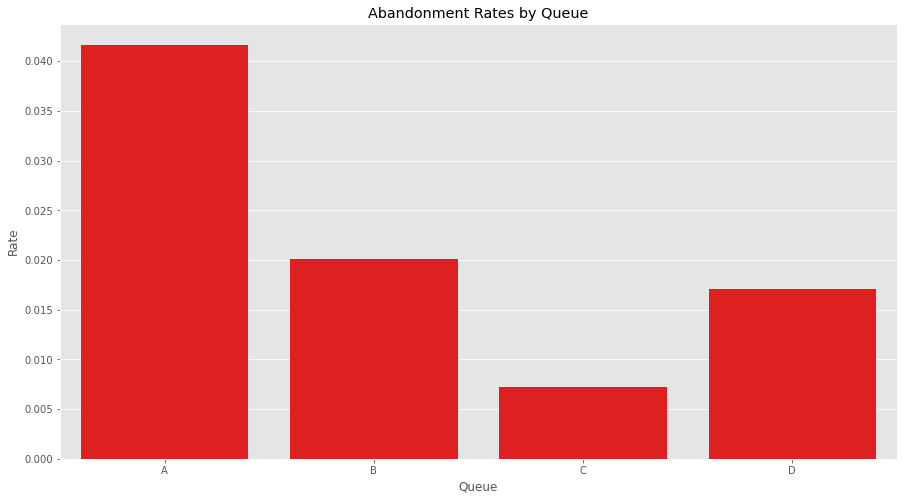

In [55]:
plt.rcParams['figure.figsize'] = (15,8)

sns.barplot(x=abandonment_df['Queue'], y=abandonment_df['Rate'], color='Red')
plt.title('Abandonment Rates by Queue')

Text(0.5, 1.0, 'Abandonment Rate by Queue')

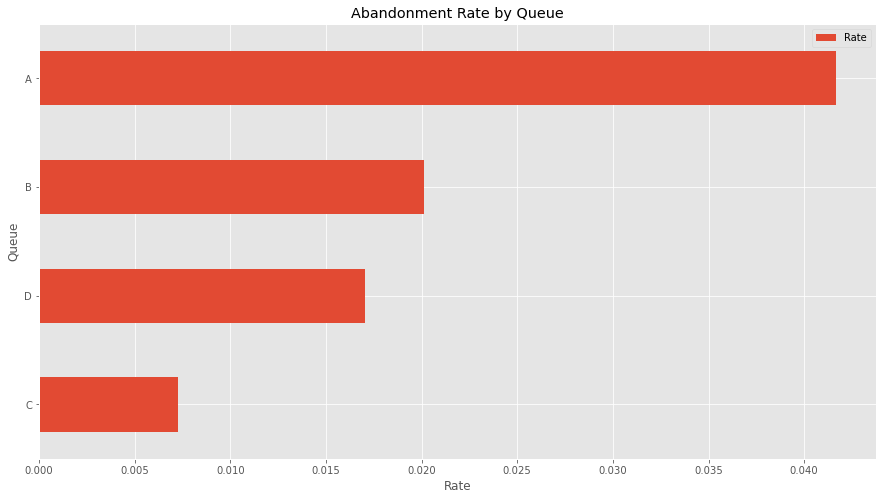

In [56]:
abandonment_df.sort_values('Rate', ascending=True).plot.barh(x='Queue', y='Rate')

plt.xlabel('Rate')
plt.title('Abandonment Rate by Queue')

In [57]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#the original code as written here did not work. I do not understand the breakdown or layout of it at all. 


In [58]:
service_level

,Calls_x,Calls_y,Service Level %
Rep ID,,,
Amanda,3,5,60.000000
Andy,3,10,30.000000
Brent,6,8,75.000000
Cam,5,11,45.454545
Duke,6,14,42.857143
Joe,2,10,20.000000
Lilly,4,12,33.333333
Todd,2,6,33.333333
Xander,2,6,33.333333


In [59]:
df.head()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [60]:
#purpose_counts=df.groupby('Call Purpose')

df.head()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [61]:
#purpose_group=df.groupby(['Call Purpose', 'Incoming or Outgoing'])[['Incoming or Outgoing']].count()

purpose_group=df.groupby(['Call Purpose'])

purpose_group.head()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
5,North,Product Support,2:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,2,1
6,North,Product Support,2:00 PM,Incoming,A,Joe,NO,0,0,8,1,1.0,3,1
7,North,Product Support,2:00 PM,Incoming,B,Lilly,NO,0,0,11,2,1.0,3,1
8,North,Product Support,3:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,4,1
13,North,Complaint,9:00 AM,Incoming,B,Duke,NO,0,0,9,2,1.0,4,1


In [91]:
test_pivot=pd.pivot_table(df, values='Calls', index='Incoming or Outgoing', columns='Call Purpose', aggfunc=np.sum)

test_pivot

Call Purpose,Complaint,Product Support,Sales Support
Incoming or Outgoing,,,
Incoming,51.0,82.0,75.0
Outgoing,NaN,228.0,123.0


In [89]:
#sns.histplot(data=df,x='Call Purpose', hue='Incoming or Outgoing')

#sns.countplot(x = 'Call Purpose',hue = 'Incoming or Outgoing',data = df)

In [86]:
#df.plot(kind='bar', stacked=True, color=['steelblue', 'red'])
#sns.barplot(data=df, x='Call Purpose', hue='Incoming or Outgoing', stacked=True)

#graph_df=df[['Call Purpose', 'Incoming or Outgoing']]
#graph_df.head()

#graph_df.plot(kind='bar', stacked=True)

In [79]:
# Create visualization 3 here
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()


#print(complaints, sales_support, product_support)

complaints_counts=pd.DataFrame.from_dict(complaints, orient='index', columns=['Complaints'])
sales_counts=pd.DataFrame.from_dict(sales_support, orient='index', columns=['Sales_support'])
product_counts=pd.DataFrame.from_dict(product_support, orient='index', columns=['Product_support'])


#abandonment_df=pd.DataFrame.from_dict(abandonment_rates, orient='index'

In [85]:
purpose_call_counts=product_counts.join(sales_counts, how='left')
purpose_call_counts=purpose_call_counts.join(complaints_counts, how='left')
purpose_call_counts

,Product_support,Sales_support,Complaints
Outgoing,228,123,NaN
Incoming,82,75,51.0


<AxesSubplot:>

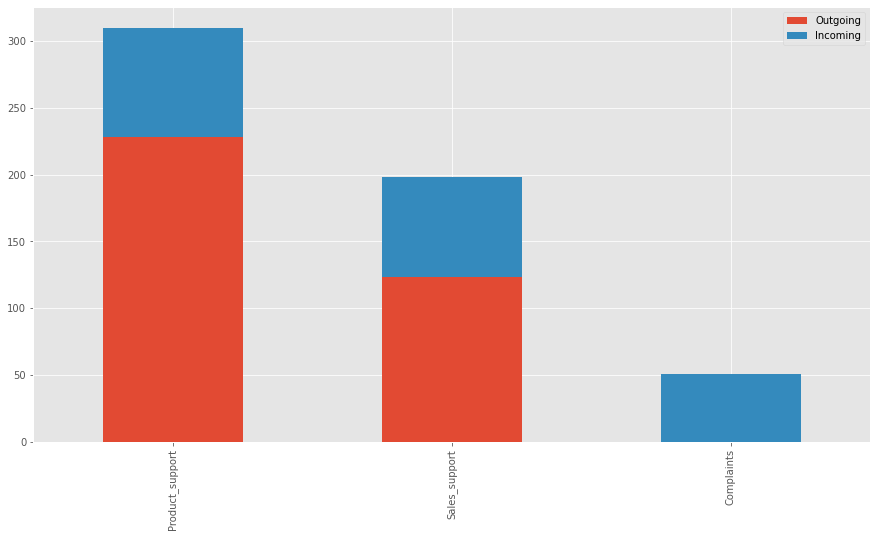

In [88]:
purpose_transposed=purpose_call_counts.T
purpose_transposed.plot(kind='bar', stacked=True)

#I feel this breakdown gives the best representation of the data. 

In [66]:
purpose_counts

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64

### Visualization Results

For each chart you created, explain why you chose the chart style you chose.

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.

1. Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?
- I think the South branch is operating more efficiently. The north branch may have a slightly higher service level rate, but the South has better numbers both in abandonment rate and average speed of answer. 
2. Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?
- on average, each rep in the south branch is taking on more calls than each rep in the north branch. I think the north branch could benefit from extra help.
3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?
- I think it would be helpful to see avg volume of calls over time for each branch, and have, overall a little more data to work with. Total call time based on each call-purpose would also be instrumental in determining efficiency.

## Submit Your Work

After you have completed your work on the assignment, push your work to your Github repo. Navigate to the repo, copy the link to your assignment and paste the URL in the Canvas assignment's submission box. 

## Bonus Mission

Create a visualization that answers this question:

1. For each call purpose, how many calls (incoming and outgoing) take place in each time block?

In [67]:
# Create your visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:
